# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Importing Datasets

In [ ]:
kc_house_data = pd.read_csv("/content/kc_house_data.csv")
train_df = pd.read_csv("/content/train.csv", index_col=0)
test_df = pd.read_csv("/content/test.csv", index_col=0)

In [ ]:
train_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
test_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1001,3131200640,20150427T000000,700000.0,4,2.00,1830,4590,2.0,0,0,3,8,1830,0,1908,0,98105,47.6593,-122.327,1650,4590
1002,984000710,20141022T000000,270000.0,3,2.00,1560,8853,1.0,0,0,3,7,1560,0,1967,0,98058,47.4312,-122.171,1610,8750
1003,4167300350,20140508T000000,258000.0,4,1.75,1730,8320,1.0,0,0,3,7,1230,500,1977,0,98023,47.3270,-122.361,1840,9800
1004,2826049282,20140614T000000,530000.0,3,2.50,1930,7214,2.0,0,0,3,8,1930,0,2005,0,98125,47.7191,-122.309,1930,7266
1005,8946750030,20141218T000000,245000.0,3,2.25,1422,3677,2.0,0,0,3,7,1422,0,2012,0,98092,47.3204,-122.178,1677,3677


The prediction task is to predict the price of a house (column price) given the other features. We drop columns zipcode, id and data as they are not relevent in this case.

In [ ]:
train_df = train_df.drop(columns= ['zipcode'])
test_df = test_df.drop(columns= ['zipcode', 'id', 'date'])

In [ ]:
train_df.shape, test_df.shape

((1000, 18), (1000, 18))

Now we split our data into 2 parts, feature to train and target variable. Target variable is house price ('price')

In [ ]:
train_x = train_df.loc[:, train_df.columns != 'price']
train_y = train_df['price']
test_x = test_df.loc[:, test_df.columns != 'price']
test_y = test_df['price']

In [ ]:
train_x.columns, test_x.columns

(Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
        'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
        'sqft_living15', 'sqft_lot15'],
       dtype='object'),
 Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
        'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
        'sqft_living15', 'sqft_lot15'],
       dtype='object'))

# Linear Regression Package

Now , lets fit the training data to our model

In [ ]:
reg = LinearRegression()
reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now we print the intercept and coefficients of our model

In [ ]:
print("Intercept for our model(theta_0) : ", reg.intercept_)
print(pd.DataFrame({'Features' : train_x.columns, 'Coef' : reg.coef_}))

Intercept for our model(theta_0) :  -23088898.608538605
         Features           Coef
0        bedrooms  -14704.280497
1       bathrooms   25687.783987
2     sqft_living      83.084210
3        sqft_lot       0.375930
4          floors   15555.580988
5      waterfront  715535.170470
6            view   63027.898001
7       condition   18816.402756
8           grade   79534.602722
9      sqft_above      42.010495
10  sqft_basement      41.073715
11       yr_built   -2400.669330
12   yr_renovated      43.682942
13            lat  553505.032276
14           long   -7424.027121
15  sqft_living15      68.015792
16     sqft_lot15      -0.515528


Check the MSE (mean squared error). mean_squared_error from sklearn accepts 2 parameters 'y_true' and 'y_pred'. True target value will be our 'train_y'. Lets find predicted target values for our training dataset.

In [ ]:
y_pred_train = reg.predict(train_x)

In [ ]:
#MSE
mse_train = mean_squared_error(train_y, y_pred_train )
print(mse_train)

31486167775.794846


We see that we get very high mse error. Lets standardize our features.

In [ ]:
scaler = StandardScaler()
scaler.fit(train_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
train_x_scaled = scaler.transform(train_x)

In [ ]:
train_x_scaled.mean(axis= 0), train_x_scaled.std(axis = 0)

(array([-1.93622895e-16,  5.32907052e-17,  8.88178420e-17,  3.73034936e-17,
         2.43360887e-16,  1.06581410e-17,  3.46389584e-17,  8.52651283e-17,
         6.39488462e-17, -1.04805054e-16,  1.42108547e-17,  7.65609798e-16,
         4.26325641e-17, -1.30384592e-14, -3.09867687e-14, -1.42108547e-17,
         1.77635684e-18]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

We see that our mean becomes zero and variance is 1.

In [ ]:
train_y_scaled = (train_y - train_y.mean())/train_y.std()

In [ ]:
train_y_scaled.mean(), train_y_scaled.std()

(5.206945985491984e-17, 0.9999999999999932)

Lets fit the regression model again and see the results

In [ ]:
reg_scaled = LinearRegression()
reg_scaled.fit(train_x_scaled, train_y_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_train_scaled = reg_scaled.predict(train_x_scaled)

In [ ]:
print("Intercept for our model(theta_0) : ", reg_scaled.intercept_)
print(pd.DataFrame({'Features' : train_x.columns, 'Coef' : reg_scaled.coef_}))

Intercept for our model(theta_0) :  3.0862932369431412e-15
         Features      Coef
0        bedrooms -0.036885
1       bathrooms  0.054575
2     sqft_living  0.167160
3        sqft_lot  0.032054
4          floors  0.023694
5      waterfront  0.187762
6            view  0.141979
7       condition  0.038188
8           grade  0.271678
9      sqft_above  0.142244
10  sqft_basement  0.079935
11       yr_built -0.199250
12   yr_renovated  0.050875
13            lat  0.230864
14           long -0.003049
15  sqft_living15  0.134254
16     sqft_lot15 -0.038087


In [ ]:
# MSE
mse_train_scaled = mean_squared_error(train_y_scaled, y_pred_train_scaled)
print(mse_train_scaled)

0.27319310156126586


We generally scale the features to improve the perfomance and avoid large error.

Now we evalute both the models on test datasets

In [ ]:
# model 1
y_pred_test = reg.predict(test_x)

#MSE
mse_test = mean_squared_error(test_y, y_pred_test)
print(mse_test)

57628154705.66998


In [ ]:
test_x_scaled = scaler.transform(test_x)
test_y_scaled = (test_y - test_y.mean())/test_y.std()

In [ ]:
# model 2
y_pred_test_scaled = reg_scaled.predict(test_x_scaled)

# MSE
mse_test_scaled = mean_squared_error(test_y_scaled, y_pred_test_scaled)
print(mse_test_scaled)

0.3484895670052034


In [ ]:
summarize_results = pd.DataFrame(index=['Python package without feature scaling','Python package with feature scaling'],
                                 columns=['training_MSE','testing_MSE'])
summarize_results['training_MSE'] = [mse_train,mse_train_scaled]
summarize_results['testing_MSE'] = [mse_test, mse_test_scaled]

display(summarize_results.style.format("{:.10f}"))
print(pd.DataFrame({'Features' : train_x.columns, 'Coef' : reg_scaled.coef_}).sort_values(by = 'Coef', ascending = False))

,training_MSE,testing_MSE
Python package without feature scaling,31486167775.7948455811,57628154705.6699829102
Python package with feature scaling,0.2731931016,0.3484895670


         Features      Coef
8           grade  0.271678
13            lat  0.230864
5      waterfront  0.187762
2     sqft_living  0.167160
9      sqft_above  0.142244
6            view  0.141979
15  sqft_living15  0.134254
10  sqft_basement  0.079935
1       bathrooms  0.054575
12   yr_renovated  0.050875
7       condition  0.038188
3        sqft_lot  0.032054
4          floors  0.023694
14           long -0.003049
0        bedrooms -0.036885
16     sqft_lot15 -0.038087
11       yr_built -0.199250


## Conclusion

We see that without scaling we get very high error. After scaling we get very low error. 

From the coefficients we see that magnitude for  'grade', 'lat','waterfront', 'sqft_living' are high and so they contribute most to the house price prediction.

With scaling with get low error on training as well as testing dataset, so we can say that this model fits our data well. 

# Linear Regression Closed form solution

## Part - a

Implement simple linear regression using the closed form and train a model for one feature (sqft living)
using the training set. Write code to predict a response for a new single-dimensional data point in the
testing set.

The closed for solution is given as $\theta = (X^T X)^{-1} X^T y$.

Were x is our training set and y is target variable. First we use only single variable so X is this case will we 1-D vector.

In [ ]:
train_x_sqft_liv = train_x[['sqft_living']]

In [ ]:
train_x_sqft_liv.shape, train_y.shape

((1000, 1), (1000,))

We need to insert a column with 1's at the start to account for the bias term ($\theta_0$)

In [ ]:
train_x_sqft_liv.insert(loc = 0, column = 'x_0', value=1)

In [ ]:
train_x_sqft_liv.shape, train_y.shape

((1000, 2), (1000,))

In [ ]:
theta_a = np.linalg.inv(np.dot(train_x_sqft_liv.T, train_x_sqft_liv)).dot(train_x_sqft_liv.T).dot(train_y)

In [ ]:
theta_a

array([-32304.65472103,    269.46205468])

Our hypothesis for linear regression (considering d dimensions) is $h_x(\theta) = \theta_0 x_0 + \theta_1 x_1 +....+ \theta_d x_d $ 

Writing in vector form
$h_x(\theta) = \textbf{$\theta^T x$} $

Therefore our prediction formula will be

In [ ]:
test_x_sqft_liv = test_x[['sqft_living']]
test_x_sqft_liv.insert(loc = 0, column = 'x_0', value=1)

In [ ]:
y_pred_test_closed_form = np.dot(theta_a.T, np.array(test_x_sqft_liv.T)[:, 0])

In [ ]:
y_pred_test_closed_form, np.array(test_y)[0]

(460810.9053519643, 700000.0)

## Part - b

Implement the closed-from solution for multiple linear regression using matrix operations and train a
model on the training set. Write code to predict a response for a new multi-dimensional data point in
the testing set.

We need to add column with 1's at start to account for $x_0$ and standardized our training and testing data. (Note - we dont scale $x_0$) 

In [ ]:
train_x_closed = train_x.copy()
train_x_closed_scaled = (train_x_closed - train_x_closed.mean())/ train_x_closed.std() 
train_x_closed_scaled.insert(loc = 0, column  = 'x_0', value=1)

test_x_closed = test_x.copy()
test_x_closed_scaled = (test_x_closed - test_x_closed.mean())/ test_x_closed.std() 
test_x_closed_scaled.insert(loc = 0, column  = 'x_0', value=1)

In [ ]:
train_x_closed_scaled.shape, train_y_scaled.shape

((1000, 18), (1000,))

In [ ]:
train_x_closed_scaled.columns

Index(['x_0', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
theta_closed_form = np.linalg.pinv(np.dot(train_x_closed_scaled.T, train_x_closed_scaled)).dot(train_x_closed_scaled.T).dot(train_y_scaled)

In [ ]:
theta_closed_form

array([ 1.16177901e-13, -3.69032482e-02,  5.46024520e-02,  1.67243475e-01,
        3.20697585e-02,  2.37055048e-02,  1.87855551e-01,  1.42049671e-01,
        3.82067647e-02,  2.71813718e-01,  1.42314851e-01,  7.99750595e-02,
       -1.99349813e-01,  5.09001715e-02,  2.30979722e-01, -3.05082836e-03,
        1.34321094e-01, -3.81060382e-02])

In [ ]:
y_pred_train_closed_form = np.dot(theta_closed_form.T, np.array(train_x_closed_scaled.T))
y_pred_test_closed_form = np.dot(theta_closed_form.T, np.array(test_x_closed_scaled.T))

In [ ]:
mse_train_closed = mean_squared_error(train_y_scaled, y_pred_train_closed_form)
mse_test_closed = mean_squared_error(test_y_scaled, y_pred_test_closed_form)

In [ ]:
summarize_results_closed = pd.DataFrame(index=['Python package with feature scaling','Closed Form Solution'],
                                        columns=['training_MSE','testing_MSE'])
summarize_results_closed['training_MSE'] = [mse_train_scaled,mse_train_closed]
summarize_results_closed['testing_MSE'] = [mse_test_scaled, mse_test_closed]

display(summarize_results_closed.style.format("{:.10f}"))


,training_MSE,testing_MSE
Python package with feature scaling,0.2731931016,0.3484895670
Closed Form Solution,0.2731931016,0.3396416052


We see that we get almost same error using python package and closed form solution. Because python package implements closed form solution. 

# Gradient Descent

We used the scaled dataset for doing gradient descent.

In [ ]:
class MyLinearRegression():
  def __init__(self):
    pass

  def fit(self, X, y, learning_rate = 0.01, loss_diff = 10**-5, n_iter = 1000, method = 'closed-form'):
    # we convert X, y to numpy array

    self.x_shape = X.shape 
    # X -> m*d
    X = np.array(X)

    y = np.array(y)
    # y -> m*1
    y = np.reshape(y, newshape= (self.x_shape[0], 1))

    # theta -> d*1
    self.theta = np.zeros(shape = (self.x_shape[1] + 1, 1))

    # x_0 bias term
    x_0 = np.ones(shape=(self.x_shape[0], 1))

    X = np.hstack((x_0, X))

    # Intialize itr to 1 as we compute theta once before entering loop and initialize loss array
    self.itr = 1
    self.loss = []
    self.learning_rate = learning_rate

    def loss_function():
      return np.sum((np.dot(X, self.theta) - y)**2)/ 2*self.x_shape[0]
    
    # Initial loss with theta = 0 
    self.loss.append(loss_function())

    # Update theta once
    self.theta = self.theta - learning_rate*np.dot(X.T,(np.dot(X, self.theta) - y))/self.x_shape[0]
    self.loss.append(loss_function())

    ''' we stop loop if one of the condition is satisfied :
        - difference between consecutive values of loss function is samller than given loss_diff
        - after executing it for specified number of iterations
    '''
    while (self.itr < n_iter):
      if (abs(self.loss[-1] - self.loss[-2]) < loss_diff):
        break
      else:
        self.theta = self.theta - learning_rate*np.dot(X.T,(np.dot(X, self.theta) - y))/self.x_shape[0]
        self.loss.append(loss_function())
        self.itr = self.itr + 1

    # print(self.loss)
    # print(self.theta)

  def predict(self, X):
    X = np.array(X)
    x_0 = np.ones(shape=(self.x_shape[0], 1))
    X = np.hstack((x_0, X))

    return np.dot(X, self.theta)

  def plot_loss_function(self):
    fig = plt.figure()
    plt.plot(range(self.itr + 1), self.loss)
    plt.xlabel('No of Iterations')
    plt.ylabel('Loss function')
    
    learning_rate_patch = mpatches.Patch(color=None, label='Learning rate : {}'.format(self.learning_rate))
    iteration_patch = mpatches.Patch(color=None, label='Learning rate : {}'.format(self.itr))
    plt.legend(handles=[learning_rate_patch, iteration_patch])

    plt.show()

In [ ]:
my_reg = MyLinearRegression()

In [ ]:
my_reg.fit(train_x_scaled, train_y_scaled)

In [ ]:
y_pred_test_my_reg = my_reg.predict(test_x_scaled)

In [ ]:
mean_squared_error(test_y_scaled,y_pred_test_my_reg )

0.34854084211373454

We see that we get almost same mse on test set as we got from closed form solution/package. By default it uses learning rate of 0.01, and it it stops when we either reach 1000 iteration or when consecutive loss function difference is $10^{-5}$. We can also plot loss function vs iterations. We expect loss function to decrease after every iteration.

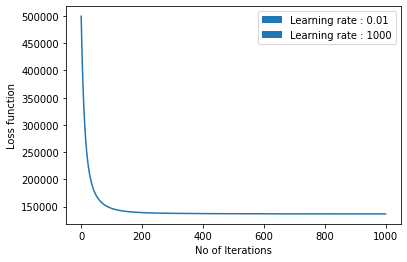

In [ ]:
my_reg.plot_loss_function()

In the above plot after 400 iterations we see flat line, so loss doesn't decrease any further and we stop it.

In the above example we used default learning rates and iterations. But we can change these values and see how gradient descent works.

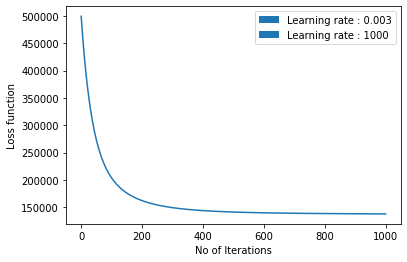

In [ ]:
my_reg.fit(train_x_scaled, train_y_scaled, learning_rate=0.003)
my_reg.plot_loss_function()

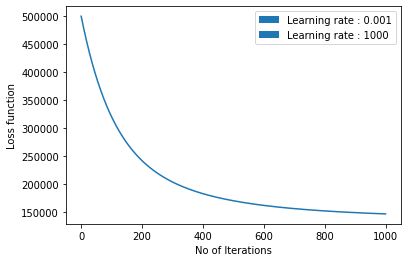

In [ ]:
my_reg.fit(train_x_scaled, train_y_scaled, learning_rate=0.001)
my_reg.plot_loss_function()

From the above 3 figures we see that as we decrease the learning rate our loss function decreases very slowly and hence we would need more iteration to achieve the optimum solution. For learning rate 0.01 we achieve good results after 300 iterations, for learning rate of 0.003 we need around 600 iteration and for 0.001 we need more than 1000 iterations.

Now lets see what happens if we increase the learning rate.



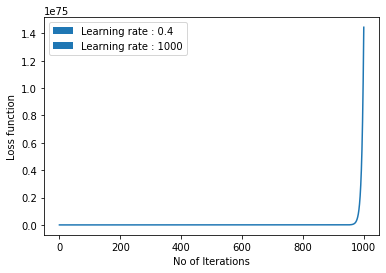

In [ ]:
my_reg.fit(train_x_scaled, train_y_scaled, learning_rate=0.4)
my_reg.plot_loss_function()

For learning rate of 0.4 we see that our loss function increases instead of decreasing (Notice the $e^{75}$ on yscale which is too high). So we see that for higher learning rate our solution diverges instead of converging. 

In general decreasing learning rate would make gradient slow by requiring extra iterations. Increasing learning rate would require less iteration and faster convergence. But increasing learning rate too high would result in very large steps and solution diverges.